Plot 450 um image, which includes all our 17A and 17B observations and these observations have been re-reduced using a bigger pixel size(4").

Using DS9, we could measure a rms noise of ~0.75 mJy/arcsec**2 from the image center. 
Considering an angule resolution of 8", our 450 um image's rms is ~5.5 mJy/beam, which is better than our garget sensitivity in 17B proposal (~9.3 mJy/beam).

In [1]:
import matplotlib
from astropy import units as u
matplotlib.use('Agg')
import aplpy
%matplotlib inline

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.784e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.652e+01 [aplpy.core]


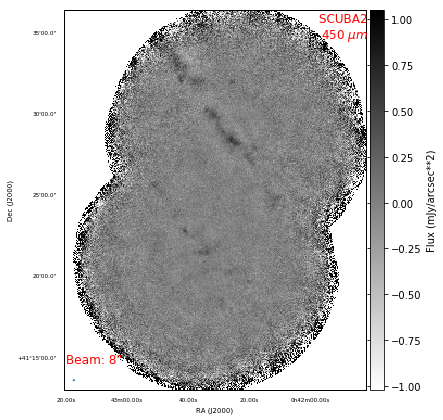

In [7]:
f_450 = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450/m31_450.conv.fits', figsize=(7,7))
f_450.show_grayscale()
f_450.add_colorbar()
f_450.colorbar.show()
f_450.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_450.colorbar.set_location('right')
f_450.colorbar.set_axis_label_text('Flux (mJy/arcsec**2)')
f_450.add_label(0.93,0.95, 'SCUBA2 \n450 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_450.show_colorscale(vmin=-1.0241015,vmax=1.0522689,cmap='gist_yarg',stretch='linear')
f_450.add_beam(major=8.*u.arcsecond,minor=8.*u.arcsecond,angle=0.0)
f_450.add_label(0.1, 0.08, 'Beam: 8\"', relative=True, size='large', layer='title',color='red')
f_450.tick_labels.set_font(size='xx-small')
f_450.axis_labels.set_font(size='x-small')

Smooth the SCUBA2 450 um image to the resolution of SCUBA2 850 um image (from 8" to 14").
And check the smoothed image.

In [9]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy
import AG_fft_tools as fft_tools
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel 
from astropy.modeling.models import Gaussian2D

In [10]:
#import model map
m31_450_file='/Users/shjiao/desktop/check/m31_450/m31_450.conv.fits'
hdu_m31_450=fits.open(m31_450_file)
data_m31_450 = hdu_m31_450[0].data
data_m31_450 = np.nan_to_num(data_m31_450)
header = hdu_m31_450[0].header

nra = header['naxis1']
ndec = header['naxis2']
header.remove('CTYPE3')
header.remove('CRVAL3')
header.remove('CDELT3')
header.remove('CRPIX3')
header.remove('CUNIT3')
header.remove('NAXIS3')
header.remove('LBOUND3')
header['NAXIS']=2
data_m31_450 =data_m31_450.reshape([ndec,nra])

#smooth
target_resolution = 14.
native_beamsize = 8.
pixel_size = 4.

FWHM_TO_SIGMA = 1./np.sqrt(8*np.log(2))

kernel_size=((target_resolution*FWHM_TO_SIGMA)**2-(native_beamsize*FWHM_TO_SIGMA)**2)**0.5
pixel_n = kernel_size/pixel_size
gauss_kernel =Gaussian2DKernel(pixel_n)
smoothed_data_gauss = convolve(data_m31_450, gauss_kernel,normalize_kernel=True)

#save fits file
outpath = r'/Users/shjiao/desktop/check/m31_450/m31_450.sm.fits'

fits.writeto(outpath,smoothed_data_gauss,header=header) 
fits.setval(outpath,'BMAJ',value=target_resolution/3600.)  
fits.setval(outpath,'BMIN',value=target_resolution/3600.) 

INFO: Auto-setting vmin to -5.043e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.179e+00 [aplpy.core]


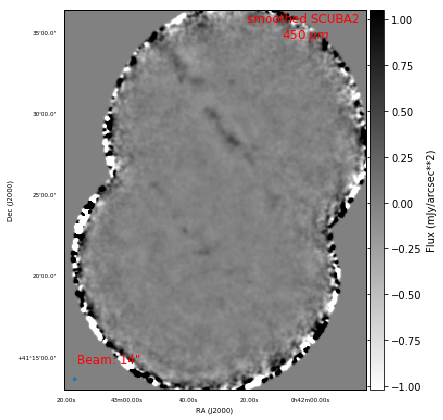

In [12]:
f_450_sm = aplpy.FITSFigure('/Users/shjiao/desktop/check/m31_450/m31_450.sm.fits', figsize=(7,7))
f_450_sm.show_grayscale()
f_450_sm.add_colorbar()
f_450_sm.colorbar.show()
f_450_sm.recenter(10.6303042,41.41090276,width=0.31,height=0.39)
f_450_sm.colorbar.set_location('right')
f_450_sm.colorbar.set_axis_label_text('Flux (mJy/arcsec**2)')
f_450_sm.add_label(0.8,0.95, 'smoothed SCUBA2 \n450 $\mu m$ ', color='red', relative=True, size='large',layer='source')
f_450_sm.show_colorscale(vmin=-1.0241015,vmax=1.0522689,cmap='gist_yarg',stretch='linear')
f_450_sm.add_beam(major=14.*u.arcsecond,minor=14.*u.arcsecond,angle=0.0)
f_450_sm.add_label(0.15, 0.08, 'Beam: 14\"', relative=True, size='large', layer='title',color='red')
f_450_sm.tick_labels.set_font(size='xx-small')
f_450_sm.axis_labels.set_font(size='x-small')